# Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data:

Let's look at the relationship between color and variety.

In [1]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('US-pumpkins.csv')
full_pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
# Select the columns we want to use
columns_to_select = ['City Name', 'Package', 'Variety', 'Origin', 'Item Size', 'Color']
pumpkins = full_pumpkins.loc[:, columns_to_select]

In [3]:
# Drop rows with missing values
pumpkins.dropna(inplace=True)

# Print out the first few rows
pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
5,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
6,BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE


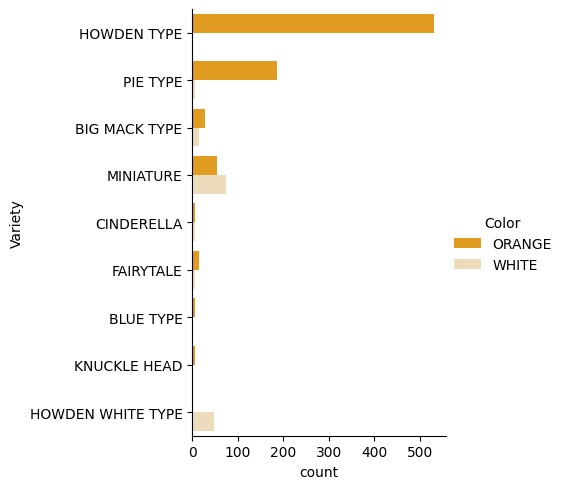

In [4]:
import seaborn as sns

# Specify colors for each values of the hue variable
palette = {
    'ORANGE': 'orange',
    'WHITE': 'wheat',
}

# Plot a bar plot to visualize how many pumpkins of each variety are orange or white
sns.catplot(data=pumpkins, y='Variety', hue='Color', kind='count', palette=palette)


In [5]:
# Different values of the 'Item Size' column
pumpkins['Item Size'].unique()

array(['med', 'lge', 'sml', 'xlge', 'med-lge', 'jbo', 'exjbo'],
      dtype=object)

Convert the 'Item Size' feature into integers from 0 to 6 (ordinal)

In [6]:
from sklearn.preprocessing import OrdinalEncoder

# Encode the 'Item Size' column using ordinal encoding
item_size_categories = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
ordinal_features = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)


In [7]:
from sklearn.preprocessing import OneHotEncoder

# Encode all the other features using one-hot encoding
categorical_features = ['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [8]:
from sklearn.compose import ColumnTransformer

# Data Transformation
ct = ColumnTransformer(transformers=[
    ('ord', ordinal_encoder, ordinal_features),
    ('cat', categorical_encoder, categorical_features)
])

# We set the output to pandas to ensure we get pandas dataframe back
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins)
encoded_features.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_MICHIGAN,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The 'Item Size' column was replaced by numbers from 0-6. The city feature was split into several one hot vector columns. One for each city in the data.

Next, we need to do a simple transformation for our label = the pumpkin color. The column contains the strings orange and white, and we want to replace them with a number 0 and 1.

We can use a label encoder class for that.

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Color' column using label encoding
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color'])
encoded_pumpkins = encoded_features.assign(Color=encoded_label)
encoded_pumpkins.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA,Color
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
# Mapping between the encoded values and the original values
list(label_encoder.inverse_transform([0, 1]))

['ORANGE', 'WHITE']

Use Seaborn to visualize the size of the orange and white pumpkins for each pumpkin type using a cat plot.

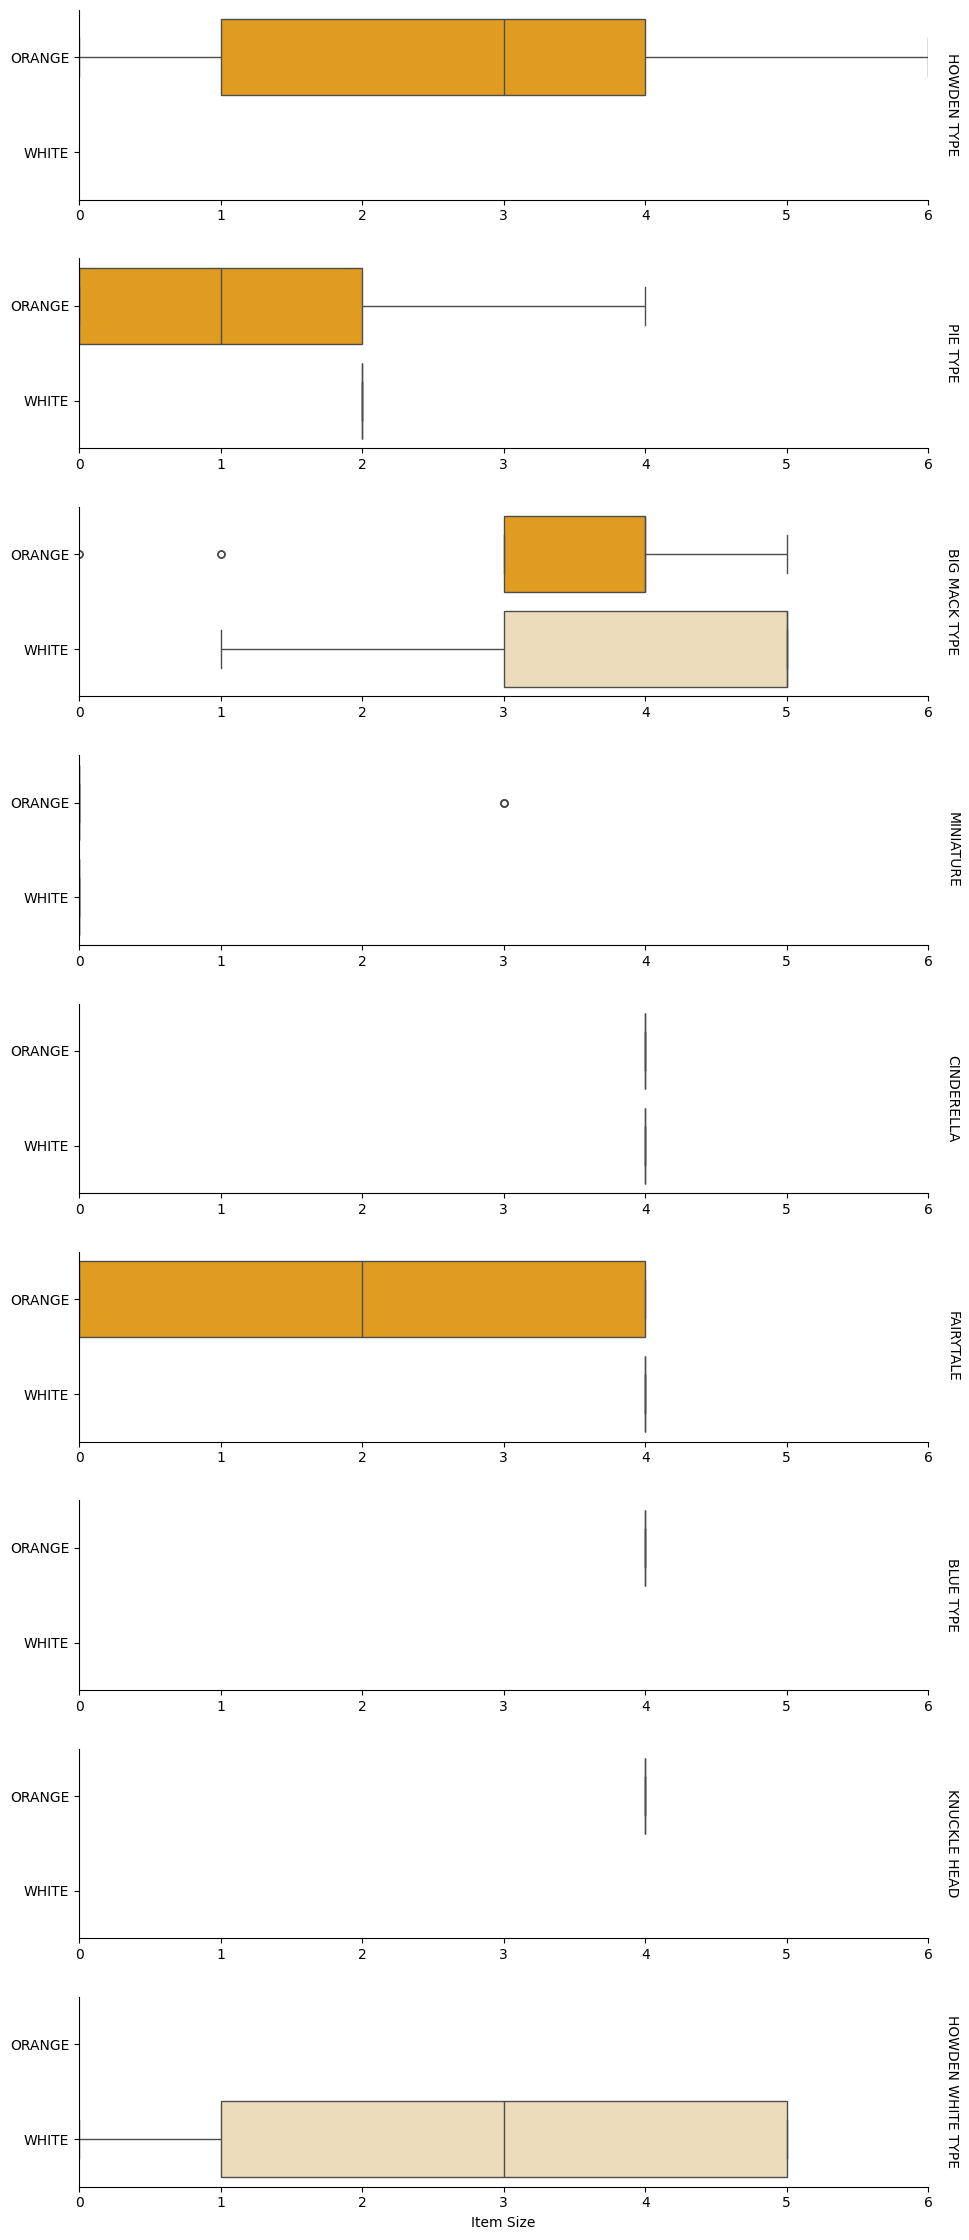

In [11]:
palette = {
    'ORANGE': 'orange',
    'WHITE': 'wheat',
}

# We need the encoded Item Size column to use it as the x-axis values in the plot
pumpkins['Item Size'] = encoded_pumpkins['ord__Item Size']

g = sns.catplot(
    data=pumpkins,
    x='Item Size',
    y='Color',
    row='Variety',
    kind='box',
    orient='h',
    sharex=False,
    margin_titles=True,
    height=2.5,
    aspect=4,
    hue='Color',
    palette=palette,
    legend=False,
)

# Defining axis labels
g.set(xlabel='Item Size', ylabel='').set(xlim=(0, 6))
g.set_titles(row_template='{row_name}').set_xlabels('Item Size')

We can also use a swarm plot to understand the relationship between the Item Size and Color

c:\Users\KYLA\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\KYLA\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='ord__Item Size'>

c:\Users\KYLA\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\KYLA\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


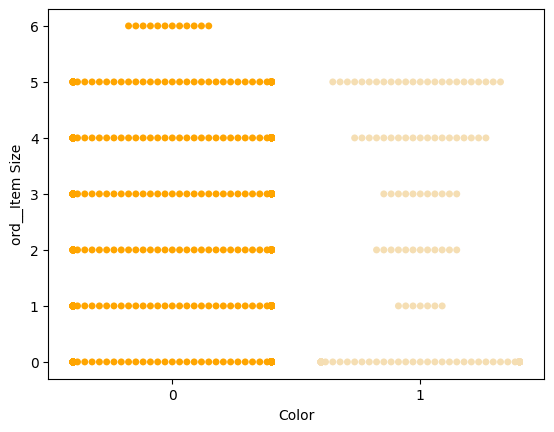

In [12]:
palette = {
    0: 'orange',
    1: 'wheat',
}

sns.swarmplot(
    x='Color',
    y='ord__Item Size',
    data=encoded_pumpkins,
    hue='Color',
    palette=palette,
    legend=False,
)


# Training the model

Before we train the model, we need to divide the data into input features X and label Y 

In [13]:
from sklearn.model_selection import train_test_split

# X is the encoded features
X = encoded_pumpkins[encoded_pumpkins.columns.difference(['Color'])]

# y is the encoded label
y = encoded_pumpkins['Color']

In [14]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model on the pumpkin dataset
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [18]:
# Evaluate the model and print the results
print(classification_report(y_test, predictions))
print('Predicted Labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

Predicted Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
F1-score:  0.7457627118644068


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 11,  22]], dtype=int64)

**Evaluation Metrics**
|       |   0   |   1   |
| :---: | :---: | :---: |
|   0   |  TN   |  FP   |
|   1   |  FN   |  TP   |

- True Negatives (TN): 162 (accurate orange predictions)
- True Positives (TP): 22 (accurate white predictions)
- False Positives (FP): 4 (pumpkins incorrectly predicted as white)
- False Negatives (FN): 11 (pumpkins incorrectly predicted as orange)

 it's preferable to have a larger number of true positives and true negatives and a lower number of false positives and false negatives, which implies that the model performs better.

**Accuracy** is generally a great metric to use but when we have unbalanced/skewed data, it doesn't tell the whole story.

Therefore, for scenarios where we have unbalanced data. We tend to use metrics such as: **Precision**, **Recall**, and **F1-score**

**Precision** TP/(TP + FP) - gives us the fraction of packages we correctly predicted as white out of all our white predictions.

**Recall** TP/(TP + FN) - gives us the fraction of packages we correctly predicted as white out of all packages that are actually white.

These metrics are generally combined in a single metric that we call the **F1-score**.

**F1-score** (2 * precision * recall)/(precision + recall) - is an important concept because it's commonly used as the main quality measure for models that are trained with unbalanced data. 

**Support**: The number of occurrences of each label retrieved

**Accuracy**: (TP + TN)/(TP + TN + FP + FN) The percentage of labels predicted accurately for a sample.

**Macro Avg**: The calculation of the unweighted mean metrics for each label, not taking label imbalance into account.

**Weighted Avg**: The calculation of the mean metrics for each label, taking label imbalance into account by weighting them by their support (the number of true instances for each label).

# ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)